<h1 style="font-family:verdana;"> <center>🧘Yoga Poses Classification using Deep Convolutional Neural Networks and Transfer Learning</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Thanks for visiting my notebook </center></p>

***

<center><img src="https://media4.giphy.com/media/fXJH29dwOkqQDAE6Zz/200w.webp?cid=ecf05e47a9tsylwzbpx0txqnv83ml47pjskkwr46xxciaall&rid=200w.webp&ct=s" heigth=100px width=180px></center>

## 👋Thanks for visting my notebook
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Feel free to fork or edit the notebook for your own convenience. If you liked the notebook, consider upvoting. It helps other people discover the notebook as well. Your support inspires me to produce more of these kernel.😊
</div>


## 🔬Yoga Pose Classification Overview
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Yoga is a systematic practice of physical exercise, breath control, relaxation, diet control, positive thinking, and meditation aimed at developing harmony in the body, mind, and environment. The practice entails low-impact physical activity, postures (called asanas), breathing techniques (pranayama), relaxation, and meditation. Most people are familiar with the physical poses or yoga positions but don't know that yoga involves so much more. <a href='https://www.emedicinehealth.com/yoga/article_em.htm'>Source</a></p>


## ❗Author's Note:
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Make sure to run the cells from top to bottom with a `GPU accelerator`. There are some linux commands present in some cells so this is important to take into account. Also, any suggestions, comments and recommendations to improve the notebook will be highly appreciated. Cheers!</p>

<center><img src="https://media4.giphy.com/media/TDKV3w4OJzt0VpLGuV/200w.webp?cid=ecf05e47a9tsylwzbpx0txqnv83ml47pjskkwr46xxciaall&rid=200w.webp&ct=s" heigth=100px width=150px></center>

***

# 🏗️Import Necessary Libraries

In [1]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# 🤙Create helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2022-09-26 02:27:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-26 02:27:54 (61.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



# 📥Load and transform data

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [4]:
# Walk through each directory
dataset = "../input/yoga-posture-dataset"
walk_through_dir(dataset)

There are 47 directories and 1 images in '../input/yoga-posture-dataset'.
There are 0 directories and 62 images in '../input/yoga-posture-dataset/Camatkarasana'.
There are 0 directories and 23 images in '../input/yoga-posture-dataset/Trikonasana'.
There are 0 directories and 77 images in '../input/yoga-posture-dataset/Padmasana'.
There are 0 directories and 54 images in '../input/yoga-posture-dataset/Dhanurasana'.
There are 0 directories and 56 images in '../input/yoga-posture-dataset/Marjaryasana'.
There are 0 directories and 69 images in '../input/yoga-posture-dataset/Utthita Parsvakonasana'.
There are 0 directories and 69 images in '../input/yoga-posture-dataset/Virabhadrasana Three'.
There are 0 directories and 20 images in '../input/yoga-posture-dataset/Sivasana'.
There are 0 directories and 43 images in '../input/yoga-posture-dataset/Pincha Mayurasana'.
There are 0 directories and 18 images in '../input/yoga-posture-dataset/Navasana'.
There are 0 directories and 81 images in '../

# 📅Placing data into a Dataframe
The first column `filepaths` contains the file path location of each individual images. The second column `labels`, on the other hand, contains the class label of the corresponding image from the file path

In [5]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [6]:
image_df

,Filepath,Label
0,../input/yoga-posture-dataset/Padmasana/File66...,Padmasana
1,../input/yoga-posture-dataset/Padmasana/File54...,Padmasana
2,../input/yoga-posture-dataset/Padmasana/File12...,Padmasana
3,../input/yoga-posture-dataset/Padmasana/File43...,Padmasana
4,../input/yoga-posture-dataset/Padmasana/File67...,Padmasana
...,...,...
4664,../input/yoga-posture-dataset/Virabhadrasana O...,Virabhadrasana One
4665,../input/yoga-posture-dataset/Virabhadrasana O...,Virabhadrasana One
4666,../input/yoga-posture-dataset/Virabhadrasana O...,Virabhadrasana One
4667,../input/yoga-posture-dataset/Virabhadrasana O...,Virabhadrasana One


# 🔭Visualizing images from the dataset

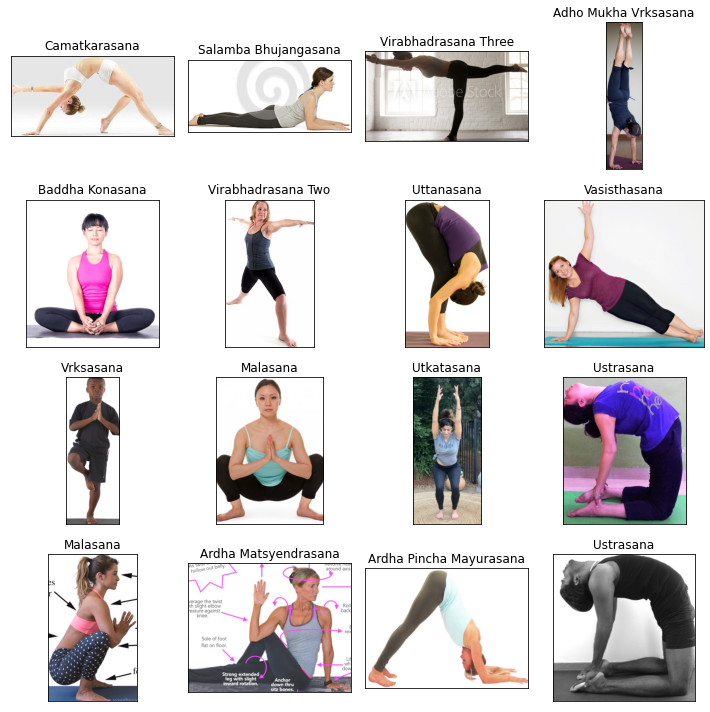

In [7]:
# Display 9 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# 🧮Computing Error Rate Analysis

In [8]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

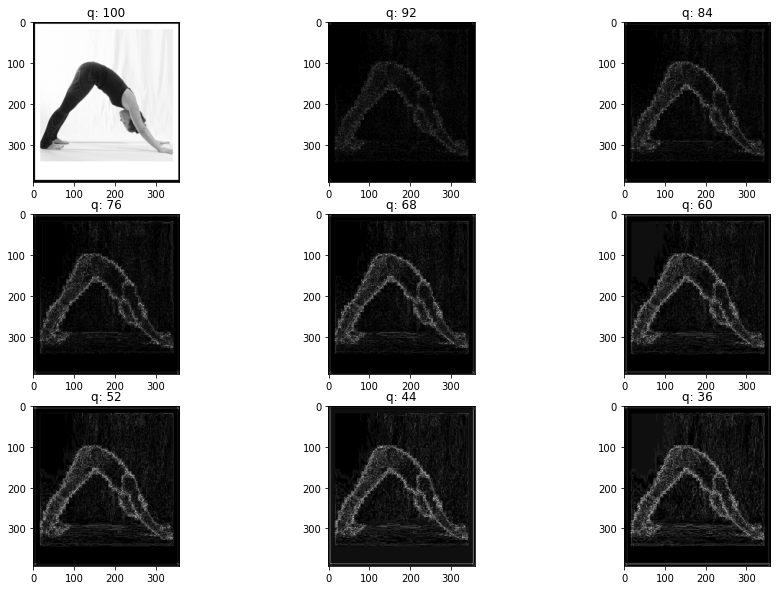

In [9]:
# View random sample from the dataset
p = random_sample('../input/yoga-posture-dataset/Adho Mukha Svanasana')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

# 📝Data Preprocessing
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The data will be split into three different categories: Training, Validation and Testing. The training data will be used to train the deep learning CNN model and its parameters will be fine tuned with the validation data. Finally, the performance of the data will be evaluated using the test data(data the model has not previously seen).</p>

In [10]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=1)

In [11]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [12]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2988 validated image filenames belonging to 43 classes.
Found 747 validated image filenames belonging to 43 classes.
Found 934 validated image filenames belonging to 43 classes.


In [13]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Setup data augmentation
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal_and_vertical"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),                       
], name="data_augmentation")

2022-09-26 02:27:58.824604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 02:27:58.933796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 02:27:58.934623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 02:27:58.935993: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# 🤹Training the model
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The model images will be subjected to a pre-trained CNN model called MobileNetV2. Three callbacks will be utilized to monitor the training. These are: Model Checkpoint, Early Stopping, Tensorboard callback. The summary of the model hyperparameter is shown as follows:</p>

**Batch size** : 32

**Epochs** : 100

**Input Shape** : (224, 224, 3)

**Output layer** : 43



In [14]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

17620992/17605208 [==============================] - 0s 0us/step


In [15]:
# Create checkpoint callback
checkpoint_path = "yoga_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [16]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3,
                                                  restore_best_weights=True) # if val loss decreases for 3 epochs in a row, stop training

# 🚄Train the model

In [17]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)
x = data_augmentation(x)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(43, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "yoga_classification"),
        checkpoint_callback,
    ]
)

2022-09-26 02:28:04.523976: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-26 02:28:04.524033: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-26 02:28:04.525956: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-09-26 02:28:04.739959: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-26 02:28:04.740143: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Saving TensorBoard log files to: training_logs/yoga_classification/20220926-022804


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2022-09-26 02:28:05.471359: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-09-26 02:28:09.730477: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/94 [..............................] - ETA: 15:01 - loss: 3.9387 - accuracy: 0.0000e+00

2022-09-26 02:28:15.303199: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-26 02:28:15.303254: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/94 [..............................] - ETA: 39s - loss: 3.9213 - accuracy: 0.0312      

2022-09-26 02:28:15.635257: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-26 02:28:15.636189: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-09-26 02:28:15.776613: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 456 callback api events and 453 activity events. 
2022-09-26 02:28:15.795977: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-26 02:28:15.824058: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/yoga_classification/20220926-022804/train/plugins/profile/2022_09_26_02_28_15

2022-09-26 02:28:15.840834: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/yoga_classification/20220926-022804/train/plugins/profile/2022_09_26_02_28_15/71cc3a4f9d91.trace.json.gz
2022-09-26 02:28:15.902595: I te

 7/94 [=>............................] - ETA: 38s - loss: 3.9887 - accuracy: 0.0223

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


94/94 [==============================] - 44s 371ms/step - loss: 3.9531 - accuracy: 0.0234 - val_loss: 3.8417 - val_accuracy: 0.0214
Epoch 2/100
94/94 [==============================] - 24s 260ms/step - loss: 3.8709 - accuracy: 0.0325 - val_loss: 3.7819 - val_accuracy: 0.0281
Epoch 3/100
94/94 [==============================] - 25s 266ms/step - loss: 3.7996 - accuracy: 0.0338 - val_loss: 3.7324 - val_accuracy: 0.0308
Epoch 4/100
94/94 [==============================] - 26s 272ms/step - loss: 3.7433 - accuracy: 0.0462 - val_loss: 3.6883 - val_accuracy: 0.0415
Epoch 5/100
94/94 [==============================] - 25s 270ms/step - loss: 3.6905 - accuracy: 0.0559 - val_loss: 3.6467 - val_accuracy: 0.0522
Epoch 6/100
94/94 [==============================] - 25s 271ms/step - loss: 3.6376 - accuracy: 0.0666 - val_loss: 3.6074 - val_accuracy: 0.0602
Epoch 7/100
94/94 [==============================] - 26s 271ms/step - loss: 3.6016 - accuracy: 0.0679 - val_loss: 3.5701 - val_accuracy: 0.0763
Epoc

# ✔️Model Evaluation
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The test dataset will be used to evaluate the performance of the model.One of the metrics that will be tested would be accuracy which measures the fraction of predictions the model got right. Other metrics are as follows:   </p>

<h3>Precision(P):</h3> 
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The fraction of true positives (TP, correct predictions) from the total amount of relevant results, i.e., the sum of TP and false positives (FP). For multi-class classification problems, P is averaged among the classes. The following is the formula for precision.</p>

<h4> <center>$P=TP/(TP+FP)$</center></h4> 

<h3>Recall(R): </h3> 
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The fraction of TP from the total amount of TP and false negatives (FN). For multi-class classification problems, R gets averaged among all the classes. The following is the formula for recall.</p>
<h4><center>$R=TP/(TP+FN)$</center></h4>

<h3>F1 score(F1): </h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The harmonic mean of precision and recall. For multi-class classification problems, F1 gets averaged among all the classes. The following is the formula for F1 score.</p>
<h4><center>$F1=2 * (TP * FP)/(TP+FP)$</center></h4>




In [18]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.89230
Test Accuracy: 80.19%


# 📉Visualizing loss curves

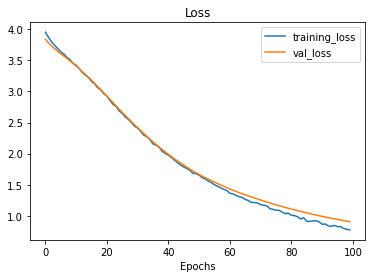

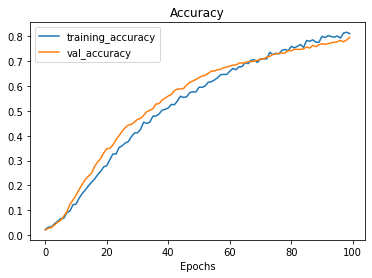

In [19]:
plot_loss_curves(history)

# 🔮Making predictions on the test data

In [20]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['Vasisthasana', 'Utkatasana', 'Camatkarasana', 'Bitilasana', 'Bitilasana']


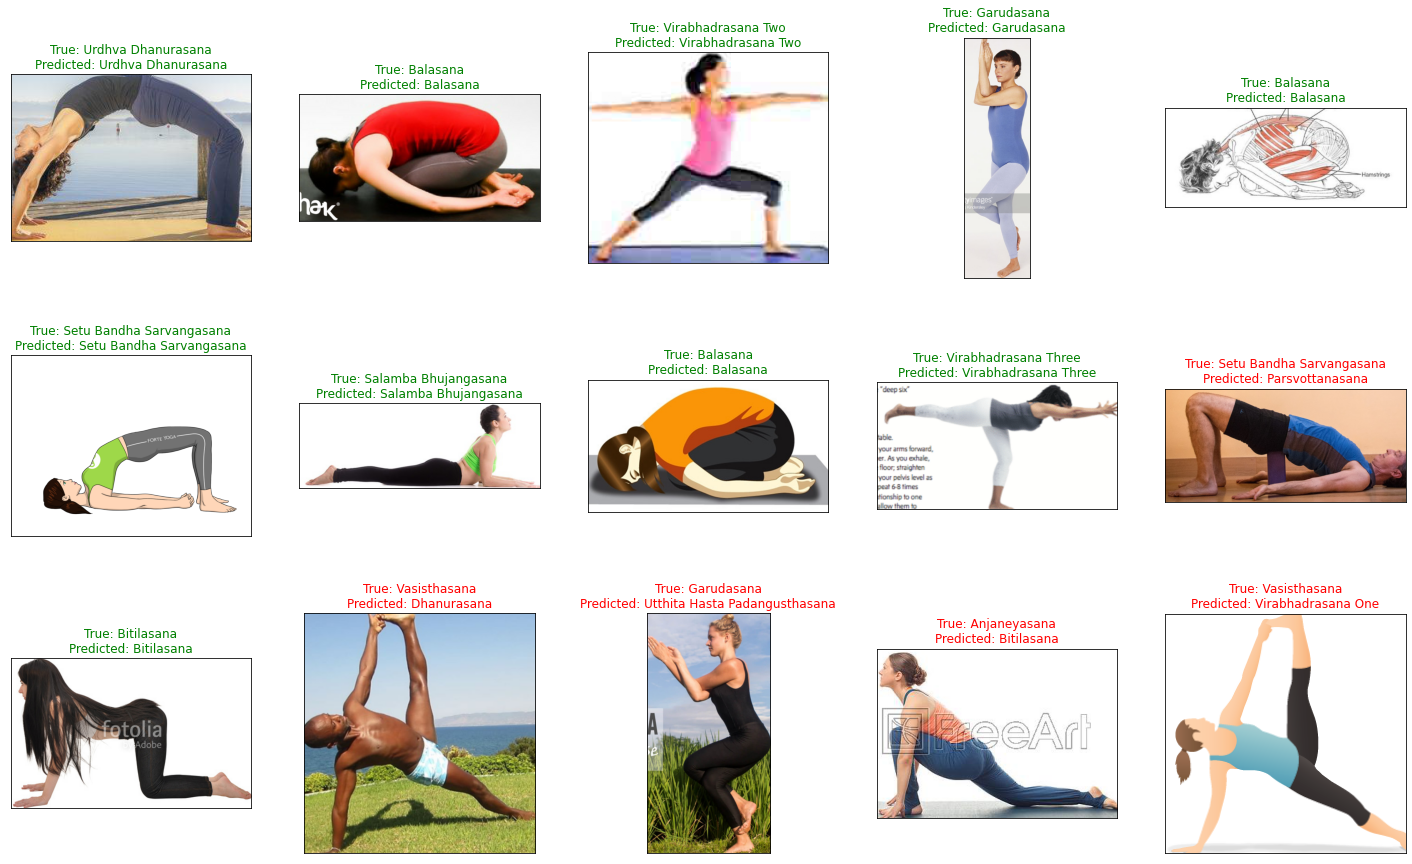

<Figure size 432x288 with 0 Axes>

In [21]:
  # Display 15 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

# 📊Plotting the classification reports and confusion matrix

In [22]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.62      0.95      0.75        19
         Adho Mukha Vrksasana       0.95      1.00      0.97        18
                    Alanasana       0.00      0.00      0.00         2
                 Anjaneyasana       0.83      0.44      0.58        34
            Ardha Chandrasana       0.91      0.83      0.87        24
         Ardha Matsyendrasana       0.86      0.98      0.92        45
               Ardha Navasana       0.00      0.00      0.00         2
      Ardha Pincha Mayurasana       0.87      0.68      0.76        19
            Ashta Chandrasana       0.00      0.00      0.00         1
              Baddha Konasana       1.00      0.71      0.83        21
                     Bakasana       0.76      0.85      0.80        33
                     Balasana       0.79      0.89      0.84        37
                   Bitilasana       0.67      0.77      0.71        39
     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Adho Mukha Svanasana,0.620690,0.947368,0.750000,19.000000
Adho Mukha Vrksasana,0.947368,1.000000,0.972973,18.000000
Alanasana,0.000000,0.000000,0.000000,2.000000
Anjaneyasana,0.833333,0.441176,0.576923,34.000000
Ardha Chandrasana,0.909091,0.833333,0.869565,24.000000
Ardha Matsyendrasana,0.862745,0.977778,0.916667,45.000000
Ardha Navasana,0.000000,0.000000,0.000000,2.000000
Ardha Pincha Mayurasana,0.866667,0.684211,0.764706,19.000000
Ashta Chandrasana,0.000000,0.000000,0.000000,1.000000
Baddha Konasana,1.000000,0.714286,0.833333,21.000000


# ☀️Grad-Cam Visualization

**Source code inspiration can be found [here](https://www.kaggle.com/code/databeru/visual-explanations-from-deep-networks-grad-cam)**

In [24]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224, 3)

# Remove last layer's softmax
model.layers[-1].activation = None

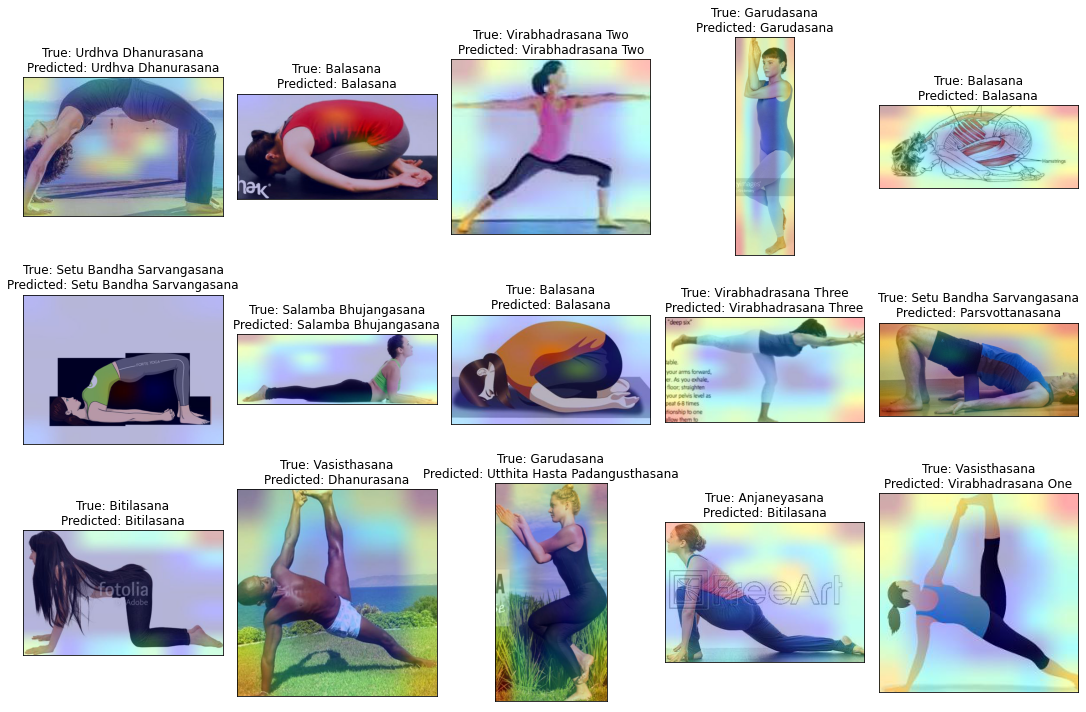

In [25]:
# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}")
plt.tight_layout()
plt.show()

***

## 👋Thanks for visting my notebook
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; background-color:purple; color:white">
    📌 I would greatly appreciate any feedback, suggestions and recommendations for improvement. Cheers! 😊
</div>

<center><img src='https://media4.giphy.com/media/M9gbBd9nbDrOTu1Mqx/giphy.gif?cid=790b7611704aa2ca4e403287801480a6c753abf45f3e6242&rid=giphy.gif&ct=s' 
     height=30px width=160px /></center>